In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Duplicate.csv')
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [3]:
df.shape

(404290, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

0    255027
1    149263
Name: is_duplicate, dtype: int64
0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

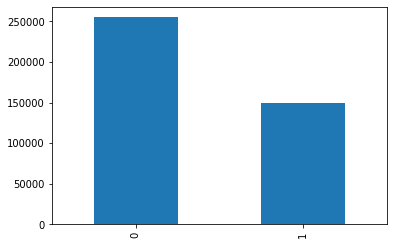

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df['is_duplicate'].count()*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
print(df['is_duplicate'].count())

404290


In [9]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('no.of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('no.of questions getting repeated',x[x].shape[0])

no.of unique questions 537933
no.of questions getting repeated 111780


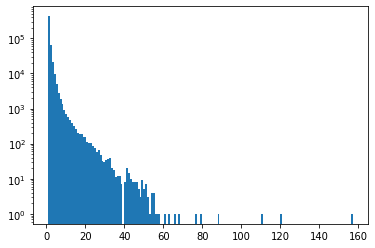

In [21]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [22]:
new_df = df.sample(30000,random_state=2)

In [23]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [24]:
new_df.duplicated().sum()

0

0    19013
1    10987
Name: is_duplicate, dtype: int64
0    63.376667
1    36.623333
Name: is_duplicate, dtype: float64


<AxesSubplot:>

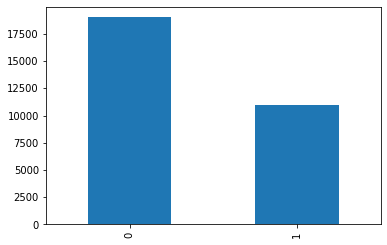

In [25]:
print(new_df['is_duplicate'].value_counts())
print((new_df['is_duplicate'].value_counts()/new_df['is_duplicate'].count())*100)
new_df['is_duplicate'].value_counts().plot(kind='bar')

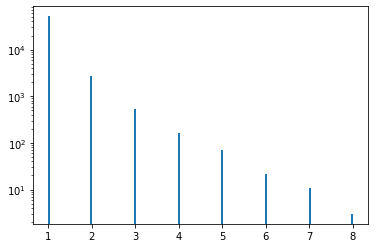

In [27]:

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()

In [28]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0
...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1


In [29]:
# Feature engineering

new_df['q1_len'] = new_df['question1'].str.len()

In [30]:

new_df['q2_len'] = new_df['question2'].str.len()
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50


In [33]:
new_df['q1_num_word'] = new_df['question1'].apply([lambda row :len(row.split())])
new_df['q2_num_word'] = new_df['question2'].apply([lambda row :len(row.split())])

In [35]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9
...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10


In [38]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1&w2)

In [40]:
new_df['common_word'] = new_df.apply(common_words,axis = 1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3
...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5


In [42]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(),row['question1'].split()))
    w2 = set(map(lambda word: word.lower().strip(),row['question2'].split()))
    return len(w1)+len(w2)

In [43]:
new_df['total_word'] = new_df.apply(total_words,axis = 1)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,total_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20


In [45]:
new_df['share_word'] = round(new_df['common_word']/new_df['total_word'],2)
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,total_word,share_word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,24,0.46
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,23,0.30
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,34,0.06
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,32,0.00
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,13,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
243932,243932,26193,356455,What are some good web scraping tutorials?,What are some good web scraping programs?,1,42,41,7,7,6,14,0.43
91980,91980,154063,154064,Can I apply for internet banking in SBI withou...,I have internet banking kit of SBI but it's no...,0,68,61,12,12,4,24,0.17
266955,266955,133017,384210,How much HE laundry detergent do you use in a ...,Can I use regular Dawn dishsoap in my dishwash...,0,73,98,14,17,4,30,0.13
71112,71112,122427,122428,What is the best way to understand and learn m...,What are some of the best ways to learn math?,1,51,45,10,10,5,20,0.25


<IPython.core.display.Javascript object>

minimum characters 2
maximum characters 391
average num of characters 59


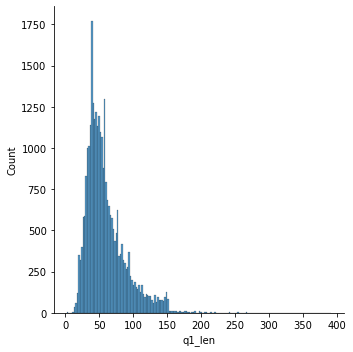

In [46]:
# Analysis of features

sns.displot(new_df['q1_len'])
print('minimum characters',new_df['q1_len'].min())
print('maximum characters',new_df['q1_len'].max())
print('average num of characters',int(new_df['q1_len'].mean()))

<IPython.core.display.Javascript object>

minimum characters 6
maximum characters 1151
average num of characters 60


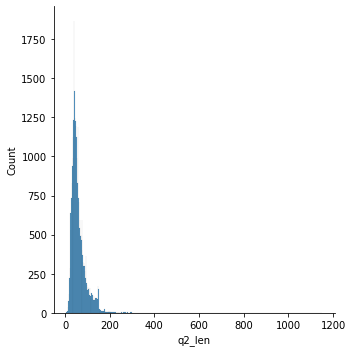

In [47]:
sns.displot(new_df['q2_len'])
print('minimum characters',new_df['q2_len'].min())
print('maximum characters',new_df['q2_len'].max())
print('average num of characters',int(new_df['q2_len'].mean()))

<IPython.core.display.Javascript object>

minimum words 1
maximum words 72
average num of words 10


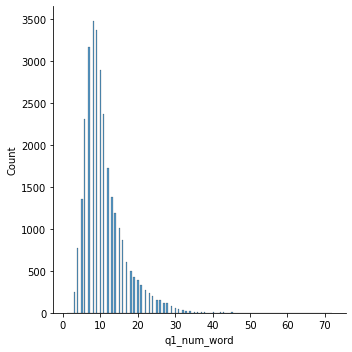

In [52]:
sns.displot(new_df['q1_num_word'])
print('minimum words',new_df['q1_num_word'].min())
print('maximum words',new_df['q1_num_word'].max())
print('average num of words',int(new_df['q1_num_word'].mean()))

<IPython.core.display.Javascript object>

minimum words 1
maximum words 237
average num of words 11


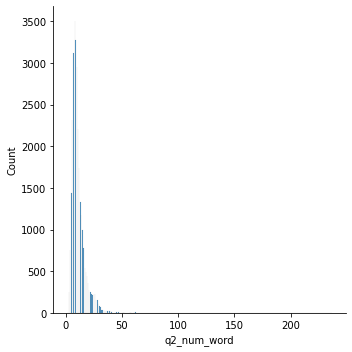

In [53]:
sns.displot(new_df['q2_num_word'])
print('minimum words',new_df['q2_num_word'].min())
print('maximum words',new_df['q2_num_word'].max())
print('average num of words',int(new_df['q2_num_word'].mean()))

<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


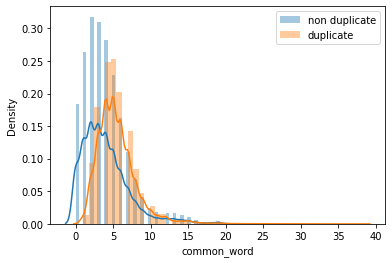

In [55]:
# Common words

sns.distplot(new_df[new_df['is_duplicate'] == 0]['common_word'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['common_word'],label='duplicate')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


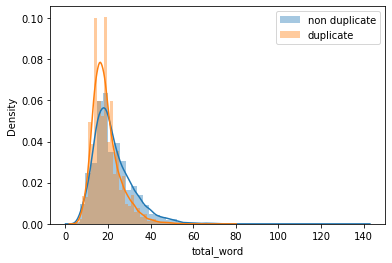

In [58]:
# total words
sns.distplot(new_df[new_df['is_duplicate'] == 0]['total_word'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['total_word'],label='duplicate')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

C:\Users\Vineet Roy\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


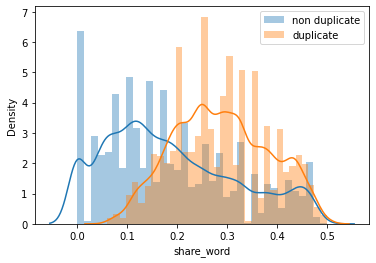

In [60]:
# word share
sns.distplot(new_df[new_df['is_duplicate'] == 0]['share_word'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate'] == 1]['share_word'],label='duplicate')
plt.legend()
plt.show()

In [61]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
398782,What is the best marketing automation tool for...,What is the best marketing automation tool for...
115086,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...
327711,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...
367788,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...
151235,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...


In [62]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,total_word,share_word
398782,1,76,77,12,12,11,24,0.46
115086,0,49,57,12,15,7,23,0.30
327711,0,105,120,25,17,2,34,0.06
367788,0,59,146,12,30,0,32,0.00
151235,0,35,50,5,9,3,13,0.23


In [63]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [64]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(30000, 6000)

In [65]:
 final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_word,q2_num_word,common_word,total_word,share_word,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,1,76,77,12,12,11,24,0.46,0,0,...,0,0,0,0,0,0,0,0,0,0
115086,0,49,57,12,15,7,23,0.30,0,0,...,0,0,0,0,0,0,0,0,0,0
327711,0,105,120,25,17,2,34,0.06,0,0,...,0,0,0,0,0,0,0,0,0,0
367788,0,59,146,12,30,0,32,0.00,0,0,...,0,0,0,1,0,0,0,0,0,0
151235,0,35,50,5,9,3,13,0.23,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [67]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7706666666666667

In [68]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

C:\Users\Vineet Roy\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7685

# Advanced Features


# 1. Token Features
cwc_min: This is the ratio of the number of common words to the length of the smaller question

cwc_max: This is the ratio of the number of common words to the length of the larger question


csc_min: This is the ratio of the number of common stop words to the smaller stop word count among the two questions

csc_max: This is the ratio of the number of common stop words to the larger stop word count among the two questions

ctc_min: This is the ratio of the number of common tokens to the smaller token count among the two questions


ctc_max: This is the ratio of the number of common tokens to the larger token count among the two questions

last_word_eq: 1 if the last word in the two questions is same, 0 otherwise

first_word_eq: 1 if the first word in the two questions is same, 0 otherwise

# 2. Length Based Features

mean_len: Mean of the length of the two questions (number of words)

abs_len_diff: Absolute difference between the length of the two questions (number of words)

longest_substr_ratio: Ratio of the length of the longest substring among the two questions to the length of the smaller question

# 3. Fuzzy Features

fuzz_ratio: fuzz_ratio score from fuzzywuzzy

 fuzz_partial_ratio: fuzz_partial_ratio from fuzzywuzzy

token_sort_ratio: token_sort_ratio from fuzzywuzzy

token_set_ratio: token_set_ratio from fuzzywuzzy